In [1]:
import numpy as np
from numpy import nan
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, LabelEncoder
import datetime

flatten = lambda l : [item for sublist in l for item in sublist]

In [2]:
# 1.
# Use Transaction Dataset, combine both files and do the following analysis.
# Transaction Data: transaction.csv, identity.csv.
path_base = r"C:\Users\emmam\Documents\nlb\data"
path_transaction = path_base+"\\"'transaction.csv'
path_identity = path_base+"\\"+'identity.csv'
t_df = pd.read_csv(path_transaction)
i_df = pd.read_csv(path_identity)


# a) Create a null_table function to count sum of null values and % of null values
# b) Print Number of df features with more than 50% null values
# c) Count the normal transactions and fraud transaction. Is it an Imbalanced data? Add %
# amount of data as text.
# d) timedelta from a given reference datetime (not an actual timestamp) for all Transaction
# and fraudulent Transaction
# e) Create Transaction Day and Transaction Hour Columns using 'TransactionDT'
# f) Transaction Amount vs Transaction Day showing Fraud and Non-Fraudulent using Bar Plot
# g) Transaction plot per Day showing Fraud and Non-Fraudulent
# h) Plot Total TransactionAmt of Transaction and fraudulent Transaction per hour
# i) Plot count of Transaction and fraudulent Transaction per hour.
# j) Distribution of TransactionAmt Feature and fraudulent Transaction.
# k) Distribution of log transform TransactionAmt (log1p) for Transaction and fraudulent
# Transaction.
# l) Display card1 - card6 features: payment card information, such as card type, card
# category, issue bank, country, etc. for transaction and Fraud Transaction.
# m) Addr1 , dist1 , dist2 distribution for Transactions and Fraud Transaction.
# n) fraud rate for addr1 and addr2
# o) Display the count of P_ and R_ emaildomain purchaser and recipient email domain
# Hint: Don’t Drop any Null Values just fill it by np.nan only while plotting the visualization. 

In [3]:
ti_df = t_df.join(i_df, on='TransactionID', lsuffix='_t', rsuffix='_i')
#ti_df = pd.concat([t_df, i_df], axis=1, join='inner')
display(ti_df)

,TransactionID_t,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
display(
    
t_df.shape,
i_df.shape,
ti_df.shape,

t_df['TransactionID'].unique().__len__(),
i_df['TransactionID'].unique().__len__(),

ti_df.isna().sum().sum(),
)



(590540, 394)

(144233, 41)

(590540, 435)

590540

144233

119778826

In [5]:
display(
t_df.dropna(axis=0),
i_df.dropna(axis=0),    
ti_df.dropna(axis=0),
)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
19,2987099,-10.0,129080.0,0.0,0.0,9.0,-43.0,22.0,-34.0,0.0,...,mobile safari generic,32.0,1334x750,match_status:2,T,F,T,F,mobile,iOS Device
370,2988702,-20.0,171610.0,0.0,0.0,13.0,-34.0,2.0,-33.0,0.0,...,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,T,T,mobile,iOS Device
372,2988706,-20.0,50100.0,0.0,0.0,12.0,-34.0,2.0,-33.0,0.0,...,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,T,T,mobile,iOS Device
375,2988714,-55.0,83328.0,0.0,0.0,9.0,-100.0,17.0,-13.0,0.0,...,ie 11.0 for desktop,24.0,1440x900,match_status:2,T,T,T,T,desktop,Trident/7.0
604,2990059,-100.0,773938.0,0.0,0.0,0.0,-1.0,18.0,-50.0,0.0,...,chrome 62.0,24.0,1280x1024,match_status:2,T,F,T,T,desktop,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143395,3572892,-30.0,267420.0,0.0,0.0,9.0,-34.0,16.0,-43.0,0.0,...,google,32.0,2048x1536,match_status:2,T,F,T,F,mobile,iOS Device
143476,3573334,-5.0,34007.0,0.0,0.0,-6.0,-30.0,25.0,-34.0,0.0,...,mobile safari 11.0,32.0,2436x1125,match_status:2,T,F,T,T,mobile,iOS Device
143477,3573336,-5.0,33041.0,0.0,0.0,-6.0,-30.0,27.0,-34.0,0.0,...,mobile safari 11.0,32.0,2436x1125,match_status:1,T,F,T,T,mobile,iOS Device
143591,3573907,-20.0,1408.0,0.0,0.0,15.0,-33.0,20.0,-100.0,0.0,...,samsung browser 4.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,SAMSUNG-SM-G900A Build/MMB29M


,TransactionID_t,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo


#### a. Create a null_table function to count sum of null values and % of null values

In [6]:
na_df = pd.DataFrame([[nan, nan, nan],
                      [1, 1, nan],
                      [1, 1, nan]], columns=['a','b','c'])

def null_table(df):
    ttl_na = df.isna().sum().sum()
    ttl_cells = np.product(df.shape)
    prop_na_cells=  np.divide(ttl_na,ttl_cells)
    return(prop_na_cells)

null_table(na_df)
    
def null_col(S):
    ttl_na = S.isna().sum()
    ttl_cells = len(S)
    prop_na_cells = np.divide(ttl_na,ttl_cells)
    return(prop_na_cells)
    
null_col(na_df['c'])


1.0

In [7]:
display(
    f"null_table(Transactions): {null_table(t_df)}",  # Transactions
    f"null_table(Identity)    : {null_table(i_df)}",  # Identity
    f"null_table(Joined)      : {null_table(ti_df)}", # Joined
)

'null_table(Transactions): 0.41073431200111266'

'null_table(Identity)    : 0.3558109650830896'

'null_table(Joined)      : 0.4662742963872147'

#### b) Print Number of df features with more than 50% null values

In [8]:
def find_fiftypct_na_cols(df):
    r=list()
    for _c in df.columns:
        pct = null_col(df[_c])
        if pct > .5:
            r.append((_c, null_col(df[_c])))
    return(r)




In [10]:
ti_df_fiftypct_na_cols_lst = find_fiftypct_na_cols(ti_df) # Transactions

display(ti_df_fiftypct_na_cols_lst) # Transactions?

[('dist1', 0.596523520845328),
 ('dist2', 0.9362837403054831),
 ('R_emaildomain', 0.7675161716395164),
 ('D5', 0.524674027161581),
 ('D6', 0.8760676668811597),
 ('D7', 0.9340992989467267),
 ('D8', 0.8731229044603245),
 ('D9', 0.8731229044603245),
 ('D12', 0.8904104717715988),
 ('D13', 0.8950926270870728),
 ('D14', 0.8946946862193924),
 ('M5', 0.5934940901547736),
 ('M7', 0.5863531682866528),
 ('M8', 0.5863311545365258),
 ('M9', 0.5863311545365258),
 ('V138', 0.8612371727571375),
 ('V139', 0.8612371727571375),
 ('V140', 0.8612371727571375),
 ('V141', 0.8612371727571375),
 ('V142', 0.8612371727571375),
 ('V143', 0.8612270125647712),
 ('V144', 0.8612270125647712),
 ('V145', 0.8612270125647712),
 ('V146', 0.8612371727571375),
 ('V147', 0.8612371727571375),
 ('V148', 0.8612371727571375),
 ('V149', 0.8612371727571375),
 ('V150', 0.8612270125647712),
 ('V151', 0.8612270125647712),
 ('V152', 0.8612270125647712),
 ('V153', 0.8612371727571375),
 ('V154', 0.8612371727571375),
 ('V155', 0.86123717

In [11]:
display(t_df.loc[(t_df['D5'].notna())&(t_df['M5'].notna())&(t_df['V339'].notna())]) # Glancing at how rows/counts when multiple attrs are not nan in original Transactions

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339


In [14]:
t_df_fiftypct_na_cols_lst = find_fiftypct_na_cols(t_df)   # Identity

display(t_df_fiftypct_na_cols_lst)


[('dist1', 0.596523520845328),
 ('dist2', 0.9362837403054831),
 ('R_emaildomain', 0.7675161716395164),
 ('D5', 0.524674027161581),
 ('D6', 0.8760676668811597),
 ('D7', 0.9340992989467267),
 ('D8', 0.8731229044603245),
 ('D9', 0.8731229044603245),
 ('D12', 0.8904104717715988),
 ('D13', 0.8950926270870728),
 ('D14', 0.8946946862193924),
 ('M5', 0.5934940901547736),
 ('M7', 0.5863531682866528),
 ('M8', 0.5863311545365258),
 ('M9', 0.5863311545365258),
 ('V138', 0.8612371727571375),
 ('V139', 0.8612371727571375),
 ('V140', 0.8612371727571375),
 ('V141', 0.8612371727571375),
 ('V142', 0.8612371727571375),
 ('V143', 0.8612270125647712),
 ('V144', 0.8612270125647712),
 ('V145', 0.8612270125647712),
 ('V146', 0.8612371727571375),
 ('V147', 0.8612371727571375),
 ('V148', 0.8612371727571375),
 ('V149', 0.8612371727571375),
 ('V150', 0.8612270125647712),
 ('V151', 0.8612270125647712),
 ('V152', 0.8612270125647712),
 ('V153', 0.8612371727571375),
 ('V154', 0.8612371727571375),
 ('V155', 0.86123717

In [15]:
display(i_df.loc[(i_df['id_03'].notna())&(i_df['id_21'].notna())&(i_df['id_27'].notna())]) # Glancing at how rows/counts when multiple attrs are not nan in original Transactions

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
19,2987099,-10.0,129080.0,0.0,0.0,9.0,-43.0,22.0,-34.0,0.0,...,mobile safari generic,32.0,1334x750,match_status:2,T,F,T,F,mobile,iOS Device
40,2987188,-5.0,15464.0,0.0,0.0,4.0,-44.0,6.0,-55.0,0.0,...,chrome 62.0,32.0,2560x1440,match_status:2,T,F,T,T,mobile,NaN
304,2988064,-70.0,400890.0,0.0,0.0,NaN,NaN,-1.0,-100.0,0.0,...,chrome 62.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Blade V6 Plus Build/MRA58K
370,2988702,-20.0,171610.0,0.0,0.0,13.0,-34.0,2.0,-33.0,0.0,...,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,T,T,mobile,iOS Device
372,2988706,-20.0,50100.0,0.0,0.0,12.0,-34.0,2.0,-33.0,0.0,...,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,T,T,mobile,iOS Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143713,3574692,-20.0,3724.0,0.0,0.0,NaN,NaN,-10.0,-43.0,0.0,...,chrome 66.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
143883,3575636,-5.0,1482.0,0.0,0.0,2.0,-33.0,8.0,-33.0,0.0,...,chrome 66.0,24.0,2961x1442,match_status:2,T,F,T,T,desktop,NaN
144036,3576423,-15.0,118746.0,0.0,0.0,NaN,NaN,3.0,-8.0,0.0,...,ie 11.0 for desktop,24.0,1280x1024,match_status:2,T,F,T,T,desktop,Trident/7.0
144086,3576701,-100.0,132650.0,0.0,0.0,-3.0,-12.0,10.0,-22.0,0.0,...,ie 11.0 for desktop,NaN,NaN,NaN,F,T,T,F,desktop,rv:11.0


In [16]:
i_df_fiftypct_na_cols_lst = find_fiftypct_na_cols(i_df)   # Joined

display(i_df_fiftypct_na_cols_lst)


[('id_03', 0.5401607121809849),
 ('id_04', 0.5401607121809849),
 ('id_07', 0.9642592194574058),
 ('id_08', 0.9642592194574058),
 ('id_18', 0.6872213709761289),
 ('id_21', 0.9642314865530079),
 ('id_22', 0.9641621542920136),
 ('id_23', 0.9641621542920136),
 ('id_24', 0.9670879757059757),
 ('id_25', 0.9644186836576928),
 ('id_26', 0.9642037536486102),
 ('id_27', 0.9641621542920136)]

In [17]:
# 435%15
# # ti_isna_sums.shape
# for i in range(0, ti_df.shape[1], 15):
#     display(ti_isna_sums[i:i+15])

#### c) Count the normal transactions and fraud transaction. Is it an Imbalanced data? Add % amount of data as text

In [18]:
display(
f"transactions marked non fraudulent : {ti_df.loc[ti_df['isFraud']==0].__len__()}",
f"transactions marked fraudulent     : {ti_df.loc[ti_df['isFraud']==1].__len__()}",
"proportion marked fraudulent       : "+"{:.3%}".format(np.divide(ti_df['isFraud'].sum() , len(ti_df))),
)

#np.divide(ti_df['isFraud'].sum() , len(ti_df))

'transactions marked non fraudulent : 569877'

'transactions marked fraudulent     : 20663'

'proportion marked fraudulent       : 3.499%'

In [19]:
display("To my lay perspective, ~3.5% of transactions marked as fraudulent seems quite high. However, there is probably some persistent amount of fraudulent fuzzing at any moment of the day (like malicious requests to web servers or ssh logins) to payment processors. Perhaps this ~3.5% represents attempted transactions, some or all of which are flagged as fraudulent and stopped. I suspect that whoever compiler of this dataset is/was particularly interested in fraudulent charges.  I could not find information on what proportion of cc charges are fraudulent to back up my intuition.")

'To my lay perspective, ~3.5% of transactions marked as fraudulent seems quite high. However, there is probably some persistent amount of fraudulent fuzzing at any moment of the day (like malicious requests to web servers or ssh logins) to payment processors. Perhaps this ~3.5% represents attempted transactions, some or all of which are flagged as fraudulent and stopped. I suspect that whoever compiler of this dataset is/was particularly interested in fraudulent charges.  I could not find information on what proportion of cc charges are fraudulent to back up my intuition.'

#### d) timedelta from a given reference datetime (not an actual timestamp) for all Transaction and fraudulent Transaction
#### e) Create Transaction Day and Transaction Hour Columns using 'TransactionDT'

In [20]:
display(
    (ti_df['TransactionDT'].min(),ti_df['TransactionDT'].max()),
    (ti_df['TransactionDT'].min()/60/60/24, ti_df['TransactionDT'].max()/60/60/24),
)

(86400, 15811131)

(1.0, 182.99920138888888)

In [126]:
incept=datetime.datetime(2998,12,31)

transdt_to_dt = lambda tdts: (incept+datetime.timedelta(seconds=tdts))

ti_df["Transaction_Day"] = ti_df['TransactionDT'].apply(transdt_to_dt)

transday_to_hr= lambda td: td.hour

ti_df["Transaction_Hour"] = ti_df["Transaction_Day"].apply(transday_to_hr)

def query_trans_dt_range(df, d0, d1):
    assert type(df) == pd.DataFrame
    assert {type(d0), type(d1)} == {datetime.datetime}
    return (df.loc[(d0.date() < df["Transaction_Day"]) & (df["Transaction_Day"] < d1.date())])

ti_df["Transaction_Day"] = ti_df["Transaction_Day"].apply(lambda dt: dt.date())

display(query_trans_dt_range(ti_df, datetime.datetime(2999,3,15), datetime.datetime(2999,3,31)))

,TransactionID_t,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Transaction_Day,Transaction_Hour
267852,3254852,0,6480010,53.970,W,12694,422.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999-03-16,0
267853,3254853,0,6480050,48.950,W,3598,516.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999-03-16,0
267854,3254854,0,6480079,161.000,W,10856,268.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999-03-16,0
267855,3254855,0,6480079,57.950,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999-03-16,0
267856,3254856,0,6480086,117.000,W,17817,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999-03-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312569,3299569,0,7775964,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999-03-30,23
312570,3299570,0,7775969,103.197,C,13832,375.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999-03-30,23
312571,3299571,0,7775971,1042.000,W,4030,174.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999-03-30,23
312572,3299572,0,7775976,68.950,W,12598,111.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999-03-30,23


#### f) Transaction Amount vs Transaction Day showing Fraud and Non-Fraudulent using Bar Plot

In [120]:
qdf = query_trans_dt_range(ti_df, datetime.datetime(2999,3,15), datetime.datetime(2999,3,31))

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

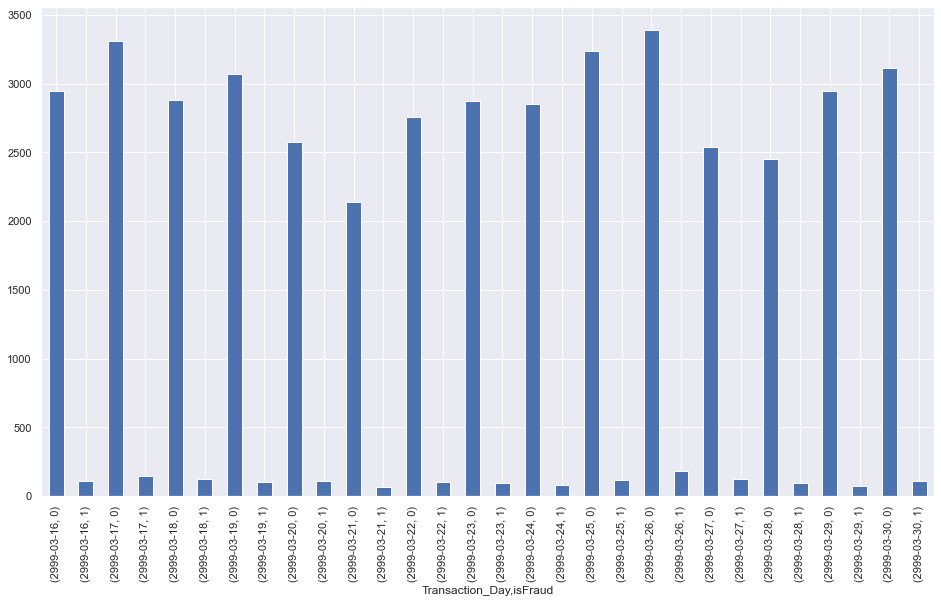

In [129]:
sns.set()
qdf.groupby('Transaction_Day')['isFraud'].value_counts().plot.bar(stacked=True, figsize=(16,9))

ti_df['TransactionAmt'].describe()

# qdf.groupby('Transaction_Day')['isFraud'].value_counts().T.plot(kind='bar', stacked=True)

# isFraudTrue_dq = qdf.loc[qdf['isFraud']==1].groupby('Transaction_Day')['isFraud'].value_counts()#['isFraud']
# isFraudFalse_dq = qdf.loc[qdf['isFraud']==0].groupby('Transaction_Day')['isFraud'].value_counts()#['isFraud']

# isFraudJoined_df#['isFraud']


In [116]:
#sns.barplot(x = isFraudJoined_df['Transaction_Day'], y = isFraudJoined_df['isFraud'])
#isFraudJoined_df['Transaction_Day']

### 